# Importing Libraries and Data

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, GridSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

import joblib
import warnings
warnings.filterwarnings('ignore')
churn = pd.read_csv("Churn_Modelling.csv")
churn = churn.dropna().drop_duplicates().drop(["RowNumber", "CustomerId", "Surname"], axis = 1)

# Training/Testing Split

In [24]:
X = churn.loc[:, "CreditScore":"EstimatedSalary"]
y = churn["Exited"]
X_train1, X_test, y_train1, y_test = train_test_split(X, y, test_size = 0.25, random_state = 20, stratify=churn['Exited'])

# Imbalanced Classes

In [25]:
ros = RandomOverSampler(random_state=20)
X_train, y_train = ros.fit_resample(X_train1, y_train1)

# Validation Folds

In [26]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=20)

# Pre-processing

In [27]:
num_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
cat_vars = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_vars),
        ('cat', categorical_transformer, cat_vars)
    ])

In [28]:
print(preprocessor.fit_transform(X_train))

[[-0.25123176  0.26433788 -0.70239547 ...  1.          1.
   0.        ]
 [-1.24170863 -1.13540266 -1.04402094 ...  1.          1.
   0.        ]
 [-0.13890964 -0.85545455  1.00573187 ...  1.          0.
   1.        ]
 ...
 [ 0.23890112  1.01086616  1.00573187 ...  0.          1.
   0.        ]
 [ 1.48465553  1.47744634 -0.70239547 ...  1.          1.
   0.        ]
 [ 0.52481197 -0.10892627 -0.36077    ...  1.          1.
   0.        ]]


# Fitting Models

Logistic regression

knn

decision tree

random forest

xg boost


## Logistic Regression

### Specifying Model

In [29]:
log_spec = LogisticRegression(max_iter=1000, random_state=20, penalty = 'l2')

log_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', log_spec)
])

log_pipeline.fit(X_train, y_train)
y_pred_log = log_pipeline.predict(X_train)

### Confusion Matrix

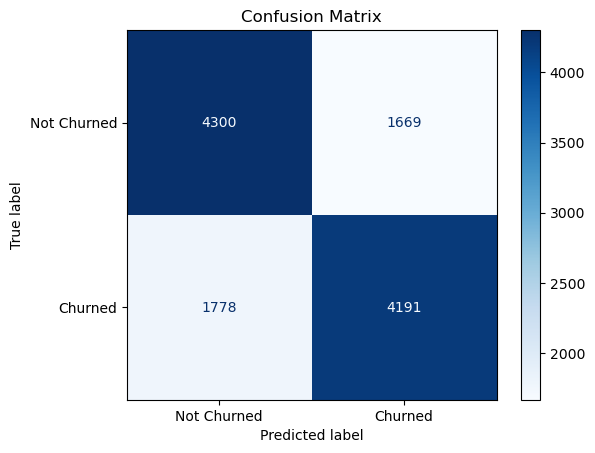

In [30]:
cm = confusion_matrix(y_train, y_pred_log)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

### ROC Curve

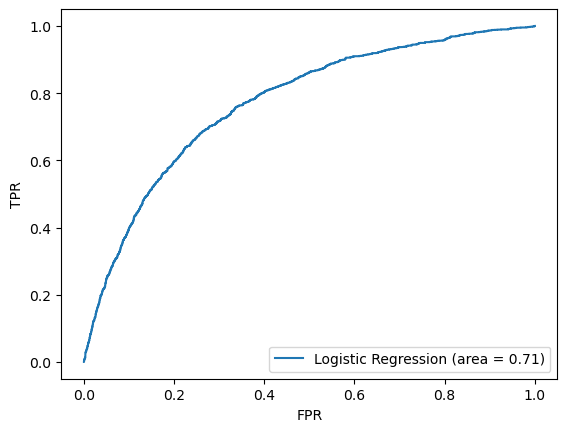

In [31]:
logit_roc_auc = roc_auc_score(y_train, y_pred_log)
fpr, tpr, thresholds = roc_curve(y_train, log_pipeline.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.legend(loc="lower right")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## KNN

### Specifying Model

In [32]:
# knn_spec = KNeighborsClassifier()

# knn_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('knn', knn_spec)
# ])

# knn_param_grid = {
#     'knn__n_neighbors': [3, 5, 7, 9], 
#     'knn__weights': ['uniform', 'distance'],
#     'knn__metric': ['minkowski', 'euclidean']
# }

# knn_grid_search = GridSearchCV(
#     knn_pipeline,
#    knn_param_grid,
#     cv=cv,
#     n_jobs=-1,
#     scoring='roc_auc'
# )

# knn_grid_search.fit(X_train, y_train)

# best_model = knn_grid_search.best_estimator_
# joblib.dump(best_model, 'best_knn_model.pkl')
knn_best_model = joblib.load('best_knn_model.pkl')
y_pred_knn = knn_best_model.predict(X_train)

### Confusion Matrix

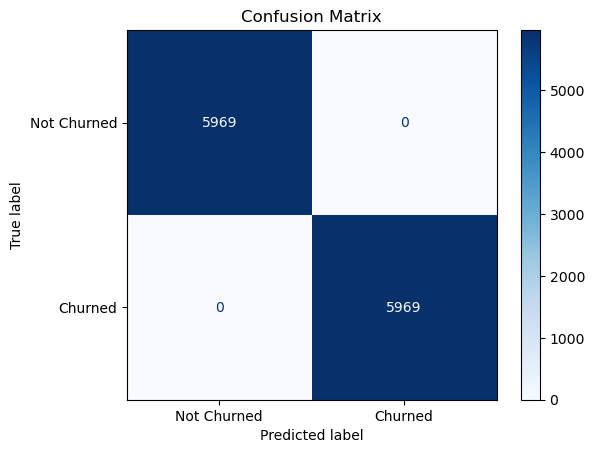

In [33]:
cm = confusion_matrix(y_train, y_pred_knn)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

### ROC Curve

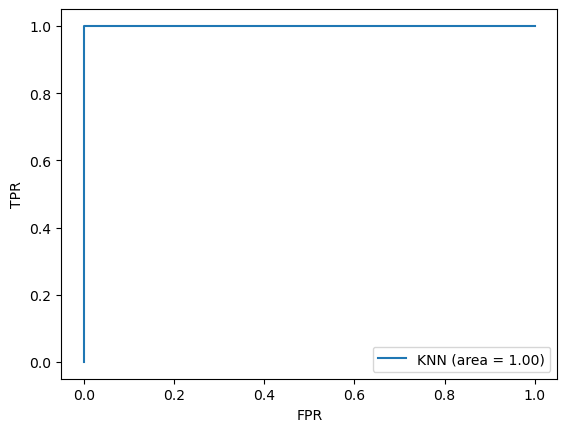

In [34]:
knn_roc_auc = roc_auc_score(y_train, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_train, knn_best_model.predict_proba(X_train)[:,1], pos_label=1)
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % knn_roc_auc)
plt.legend(loc="lower right")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

##  Decision Tree

### Specifying Model

In [35]:
tree_spec = DecisionTreeClassifier(random_state=20)

tree_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', tree_spec)
])

tree_pipeline.fit(X_train, y_train)
y_pred_tree = log_pipeline.predict(X_train)

### Confusion Matrix

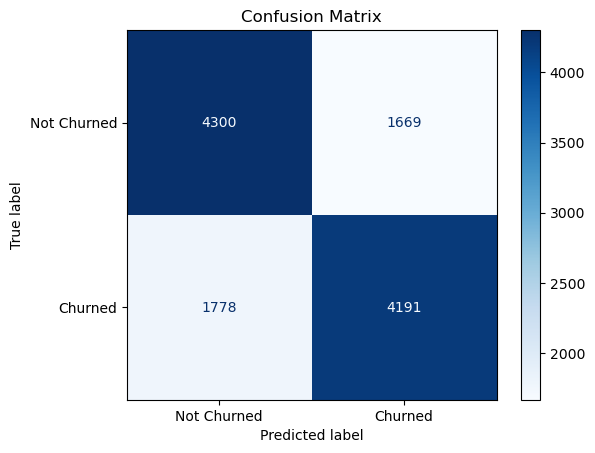

In [36]:
cm = confusion_matrix(y_train, y_pred_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

### ROC Curve

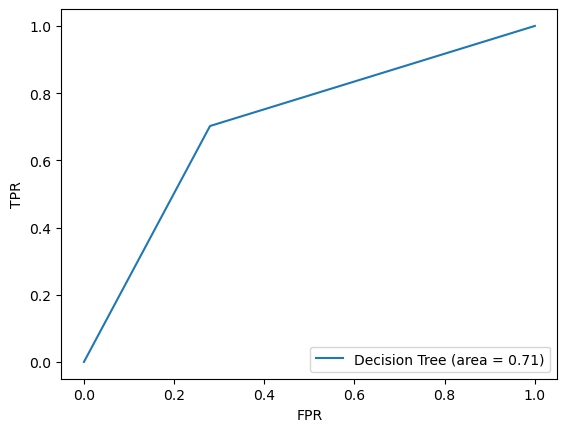

In [37]:
tree_roc_auc = roc_auc_score(y_train, y_pred_tree)
fpr, tpr, thresholds = roc_curve(y_train, y_pred_tree)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % tree_roc_auc)
plt.legend(loc="lower right")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## Random Forest

### Specifying Model

In [ ]:
# rf_spec = RandomForestClassifier(random_state=20)

# rf_pipeline = Pipeline([
#     ('preprocessor', preprocessor),
#     ('rf', rf_spec)
# ])

# rf_param_grid = {
#     'rf__n_estimators': [50, 100, 200],  # Number of trees in the forest
#     'rf__max_depth': [None, 10, 20, 30],  # Maximum depth of trees
#     'rf__min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node
#     'rf__min_samples_leaf': [1, 2, 4],    # Minimum samples required to be at a leaf node
#     'rf__max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for best split
#     'rf__bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
# }

# rf_grid_search = GridSearchCV(
#     rf_pipeline,
#    rf_param_grid,
#     cv=cv,
#     n_jobs=-1,
#     scoring='roc_auc'
# )

# rf_grid_search.fit(X_train, y_train)

# best_model = rf_grid_search.best_estimator_
# joblib.dump(best_model, 'best_rf_model.pkl')
rf_best_model = joblib.load('best_rf_model.pkl')
y_pred_rf = rf_best_model.predict(X_train)

### Confusion Matrix

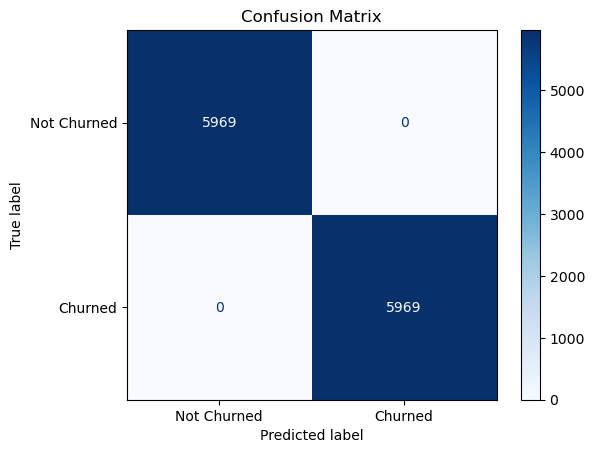

In [39]:
cm = confusion_matrix(y_train, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

### ROC Curve

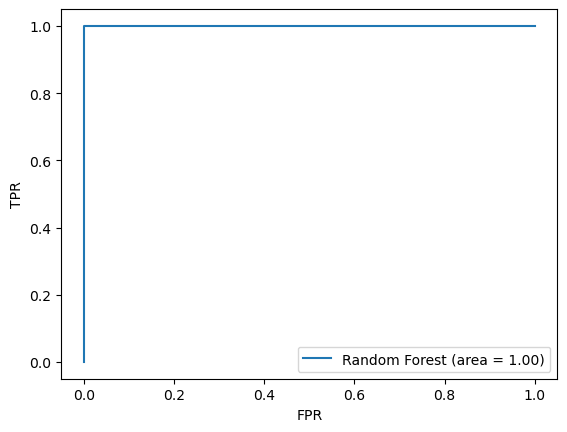

In [40]:
rf_roc_auc = roc_auc_score(y_train, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_train, rf_best_model.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.legend(loc="lower right")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## Boosted Tree

### Specifying Model

In [41]:
# boost_spec = xgb.XGBClassifier(random_state=20, eval_metric="logloss")

# boost_pipeline = Pipeline([
#     ("preprocessor", preprocessor),
#     ("boost", boost_spec)
# ])

# boost_param_grid = {
#     "boost__n_estimators": [50, 100, 200],
#     "boost__learning_rate": [0.01, 0.1, 0.2],  # <-- replace 'eta' with 'learning_rate'
#     "boost__max_depth": [3, 5],
#     "boost__min_child_weight": [1, 2],
#     "boost__subsample": [0.8, 1.0],
#     "boost__colsample_bytree": [0.8, 1.0],
#     "boost__gamma": [0, 0.1, 0.5, 1]  # 'gamma' is recognized by XGBClassifier
# }

# boost_grid_search = GridSearchCV(
#     estimator=boost_pipeline,
#     param_grid=boost_param_grid,
#     cv=cv,
#     n_jobs=-1,
#     scoring="roc_auc"
# )

# boost_grid_search.fit(X_train, y_train)

# best_model = boost_grid_search.best_estimator_
# joblib.dump(best_model, 'best_boost_model.pkl')
boost_best_model = joblib.load('best_boost_model.pkl')
y_pred_boost = boost_best_model.predict(X_train)

### Confusion Matrix

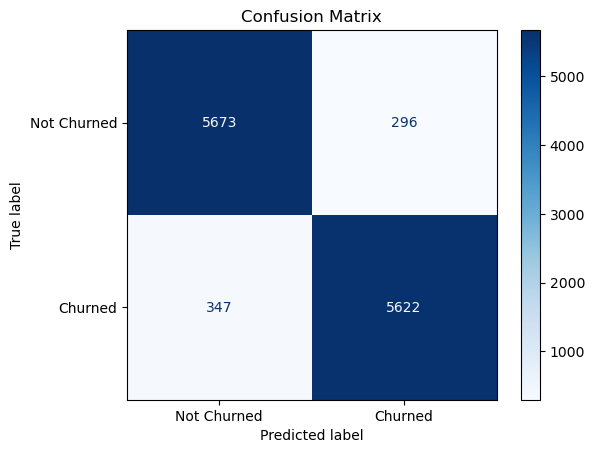

In [42]:
cm = confusion_matrix(y_train, y_pred_boost)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

### ROC Curve

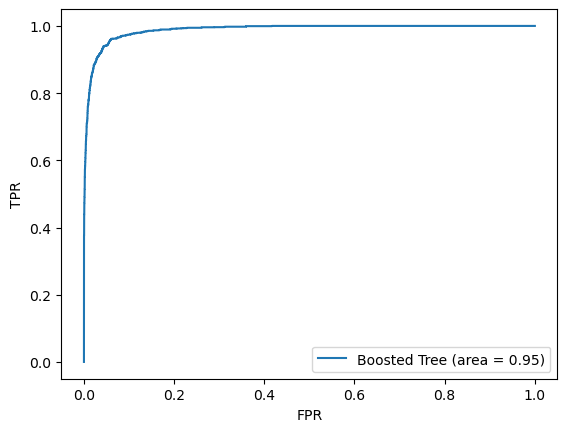

In [43]:
boost_roc_auc = roc_auc_score(y_train, y_pred_boost)
fpr, tpr, thresholds = roc_curve(y_train, boost_best_model.predict_proba(X_train)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Boosted Tree (area = %0.2f)' % boost_roc_auc)
plt.legend(loc="lower right")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

## Best Model in Testing Dataset

In [44]:
results = [
    {
        "Model": "Logistic Regression",
        "Best CV AUC": logit_roc_auc
    },
    {
        "Model": "Decision Tree",
        "Best CV AUC": tree_roc_auc
    },
    {
        "Model": "K-Nearest Neighbors",
        "Best CV AUC": knn_roc_auc
    },
    {
        "Model": "Random Forest",
        "Best CV AUC": rf_roc_auc
    },
    {
        "Model": "XGBoost",
        "Best CV AUC": boost_roc_auc
    }
]

# Convert the list of dicts to a DataFrame
df_results = pd.DataFrame(results)

# Optional: Round numeric columns for cleaner display
df_results["Best CV AUC"] = df_results["Best CV AUC"].round(4)

# Display the DataFrame
print(df_results.sort_values(by = "Best CV AUC", ascending = False))

                 Model  Best CV AUC
2  K-Nearest Neighbors       1.0000
3        Random Forest       1.0000
4              XGBoost       0.9461
0  Logistic Regression       0.7113
1        Decision Tree       0.7113


It turns out that K-nearest neighbors and random forest models have the best AUC value and we decide to fit both to our testing dataset.

## Prediction on Testing

### KNN

In [45]:
# KNN
y_pred_knn_test = knn_best_model.predict(X_test)

#### Performance

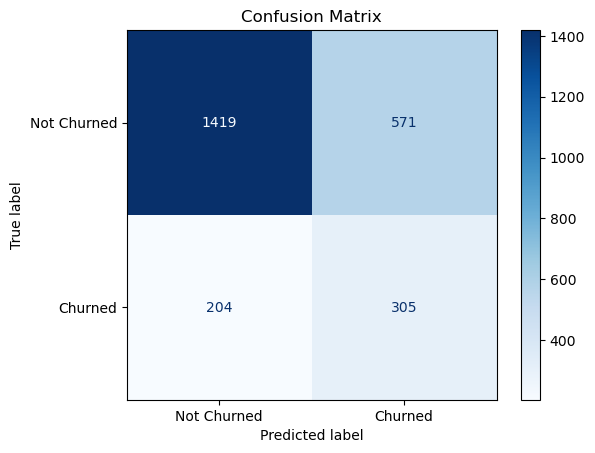


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.71      0.79      1990
           1       0.35      0.60      0.44       509

    accuracy                           0.69      2499
   macro avg       0.61      0.66      0.61      2499
weighted avg       0.77      0.69      0.72      2499

Test AUC: 0.6980


In [46]:
# Confusion Matrix
cm_knn = confusion_matrix(y_test, y_pred_knn_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn_test))

# AUC (if the model supports predict_proba, which KNN does)
y_pred_knn_proba_test = knn_best_model.predict_proba(X_test)[:, 1]
auc_knn_test = roc_auc_score(y_test, y_pred_knn_proba_test)
print(f"Test AUC: {auc_knn_test:.4f}")

### Random Forest

In [48]:
# Random Forest
y_pred_rf_test = rf_best_model.predict(X_test)

#### Performance

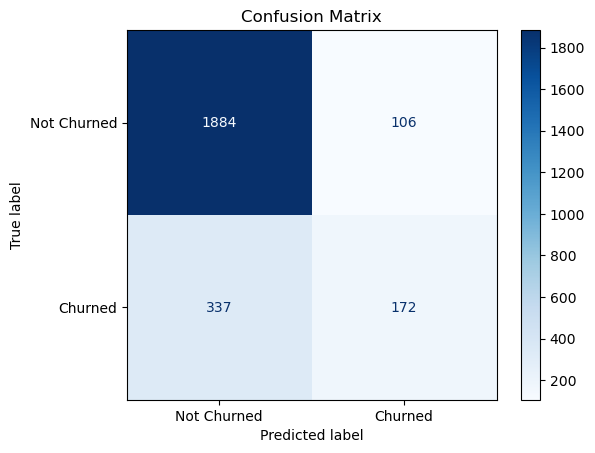


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.95      0.89      1990
           1       0.62      0.34      0.44       509

    accuracy                           0.82      2499
   macro avg       0.73      0.64      0.67      2499
weighted avg       0.80      0.82      0.80      2499

Test AUC: 0.7627


In [49]:
y_pred_rf_test = rf_best_model.predict(X_test)

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Not Churned', 'Churned'])
disp.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix")
plt.show()

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf_test))

# AUC
y_pred_rf_proba_test = rf_best_model.predict_proba(X_test)[:, 1]
auc_rf_test = roc_auc_score(y_test, y_pred_rf_proba_test)
print(f"Test AUC: {auc_rf_test:.4f}")

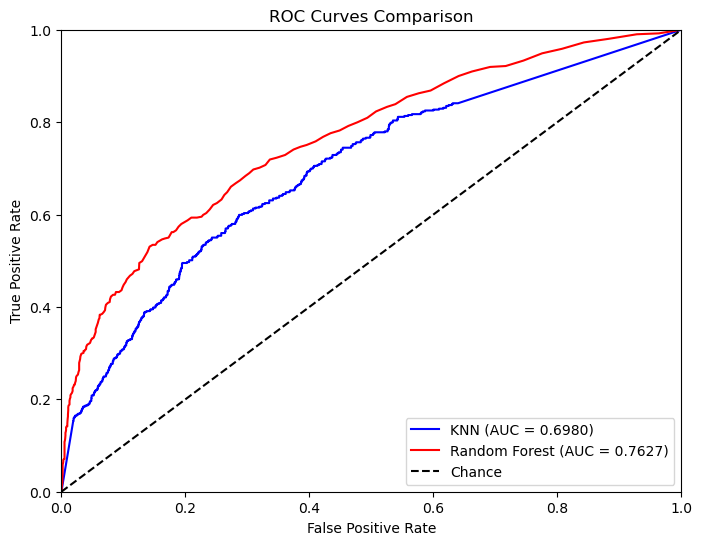

In [51]:
# Calculate FPR, TPR for KNN
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_knn_proba_test)
auc_knn = roc_auc_score(y_test, y_pred_knn_proba_test)

# Calculate FPR, TPR for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_proba_test)
auc_rf = roc_auc_score(y_test, y_pred_rf_proba_test)

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.4f})", color='blue')
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.4f})", color='red')

# Plot a reference line for random guessing
plt.plot([0, 1], [0, 1], 'k--', label="Chance")

# Configure plot
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend(loc="lower right")

# Show the plot
plt.show()

# Variable Importance Plot

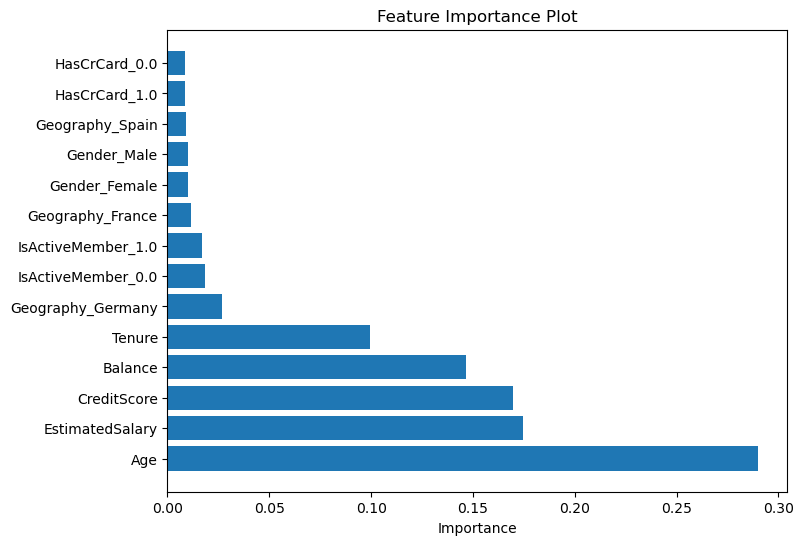

In [97]:
feature_importances = rf_best_model.named_steps['rf'].feature_importances_

features_full = rf_best_model[:-1].get_feature_names_out()

features = [s[5:] for s in features_full]

indices = np.argsort(feature_importances)

plt.figure(figsize=(8, 6))
plt.barh(range(len(features)), feature_importances[indices], align='center')
plt.yticks(range(len(features)), [features[i] for i in indices])
plt.xlabel('Importance')
plt.title('Feature Importance Plot')
plt.gca().invert_yaxis()  # To have the most important feature at the top
plt.show()